In [1]:
import sys
sys.path.append('..')
import os.path

import copy
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
from typing import Optional, Tuple

from scripts import ab_test, perform_ab, plotting_functions

DATA_DIR = os.path.join('..', 'data') 

In [2]:
#Grab the February outcomes. This is our confirmatory data
feb_enrolled_baseline = pd.read_csv(os.path.join(DATA_DIR, 'Feb_enrolled_at_baseline.csv'),
                                                 dtype={'EMPLID': str})
feb_not_enrolled_baseline = pd.read_csv(os.path.join(DATA_DIR, 'Feb_not_enrolled_at_baseline.csv'), 
                                        dtype={'EMPLID': str})


#Read in March data for exploratory analysis.
mar_enrolled_baseline = pd.read_csv(os.path.join(DATA_DIR, 'Mar_enrolled_at_baseline.csv'),
                                    dtype={'EMPLID': str})
mar_not_enrolled_baseline = pd.read_csv(os.path.join(DATA_DIR, 'Mar_not_enrolled_at_baseline.csv'), 
                                        dtype={'EMPLID': str})

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (24,25,29,30,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,17,19,20,23,28,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# February Confirmatory Outcomes

## For employees not enrolled at the baseline:

#### RQ1: How much more likely are employees to newly enroll in a 457(b) account if they receive a behaviorally-informed email rather than no email?

A/B Test, any email vs no email:

A: No Email
B: Either Email

Number in control group: 5893
Number in treatment group: 11714

Total successes, control: 0
Total successes, treatment: 0

Conversion Rate:
Control Group Rate:0.0%
Treatment Group Rate:0.0%
Percent change: 0.000%

Degree of certainty: 0.335



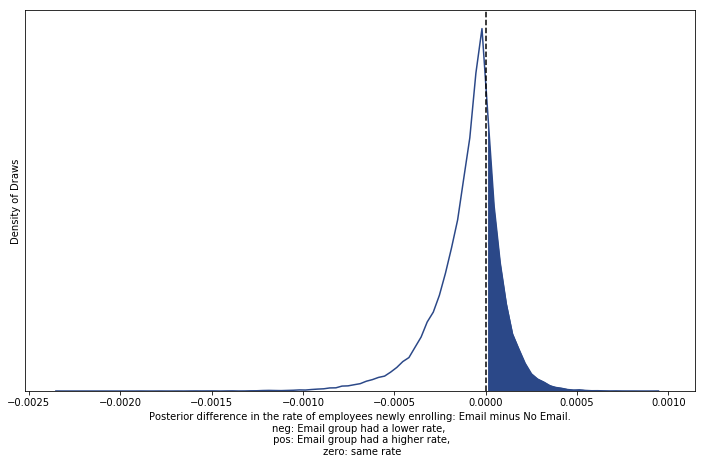

In [3]:
control, treatment = perform_ab.split_only2_groups(feb_not_enrolled_baseline)

print('A/B Test, any email vs no email:\n')

print('A: No Email')
print('B: Either Email')
print()

posterior, successes_a = perform_ab.perform_ab_test(control_df = control,
                                                    treatment_df = treatment, 
                                                    column_of_interest = 'newly_enrolled')

perform_ab.plot_abtest(posterior, successes_a, "newly enrolling", "No Email", "Email")

#### RQ2. How much more likely are employees to newly enroll in a 457(b) account if they receive an email a with simplified choice rather than one without the simplification?

A/B Test, Simplified Choice Email vs Basic Email:

A: Simplified Choice Email
B: Basic Email

Number in control group: 5860
Number in treatment group: 5854

Total successes, control: 0
Total successes, treatment: 0

Conversion Rate:
Control Group Rate:0.0%
Treatment Group Rate:0.0%
Percent change: 0.000%

Degree of certainty: 0.5



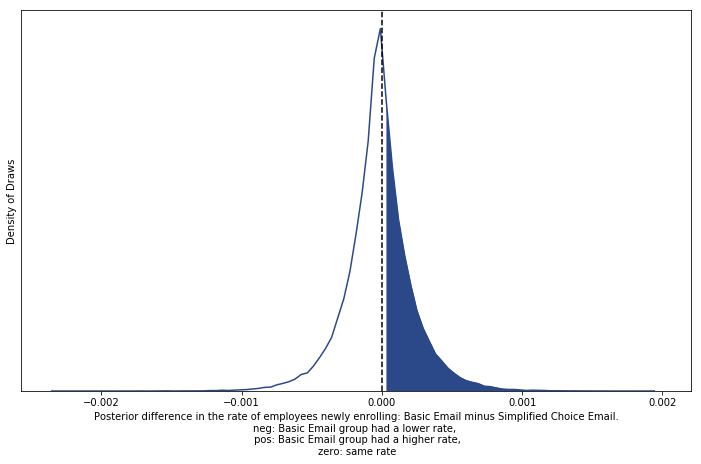

In [4]:
#Split into control and 2 treatment groups
control, basic_email, simplified_choice = perform_ab.split_groups(feb_not_enrolled_baseline)

print('A/B Test, Simplified Choice Email vs Basic Email:\n')
print('A: Simplified Choice Email')
print('B: Basic Email')
print()

posterior, successes_a = perform_ab.perform_ab_test(control_df=basic_email,
                                                    treatment_df=simplified_choice, 
                                                    column_of_interest = 'newly_enrolled')

perform_ab.plot_abtest(posterior, 
                       successes_a, 
                       "newly enrolling", 
                       "Simplified Choice Email", 
                       "Basic Email")

## For employees enrolled at the baseline:

### Success defined  as whether or not an employee increased contributions to 457b:

In [5]:
increased_crosstab = pd.crosstab(feb_enrolled_baseline.treatment_real,feb_enrolled_baseline.increased)
increased_crosstab

increased,False,True
treatment_real,,
0.0,4488,139
1.0,4413,188
2.0,4449,178


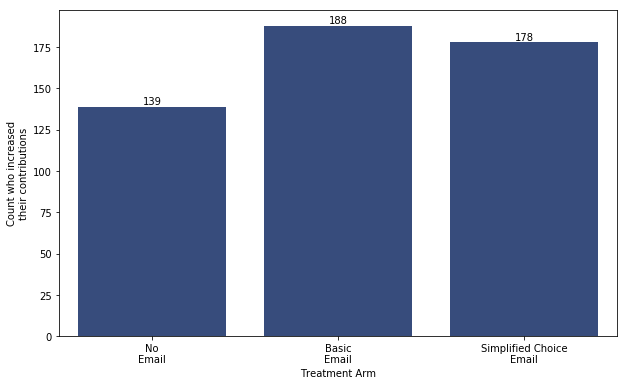

In [6]:
# Barplot of counts of those who increased contributins
plt.figure(figsize = (10,6))
sns.barplot(x = 'treatment_real', y=True, 
            data = increased_crosstab.reset_index(), color = '#2b4888')
plt.xlabel('Treatment Arm')
plt.xticks(np.arange(0,3,1), ['No\nEmail', 'Basic\nEmail', 'Simplified Choice\nEmail'])
plt.ylabel('Count who increased\ntheir contributions') #this is probably clear from the title but i was initially confused

plotting_functions.showDataLabels(f = 'int')

#### RQ3. Among employees with 457(b) accounts at baseline, how much more likely are employees to increase their contributions if they receive a behaviorally-informed email rather than no email?

A: No Email
B: Either Email

Number in control group: 4627
Number in treatment group: 9228

Total successes, control: 139
Total successes, treatment: 366

Conversion Rate:
Control Group Rate:3.004%
Treatment Group Rate:3.966%
Percent change:32.025999999999996%

Degree of certainty: 0.998



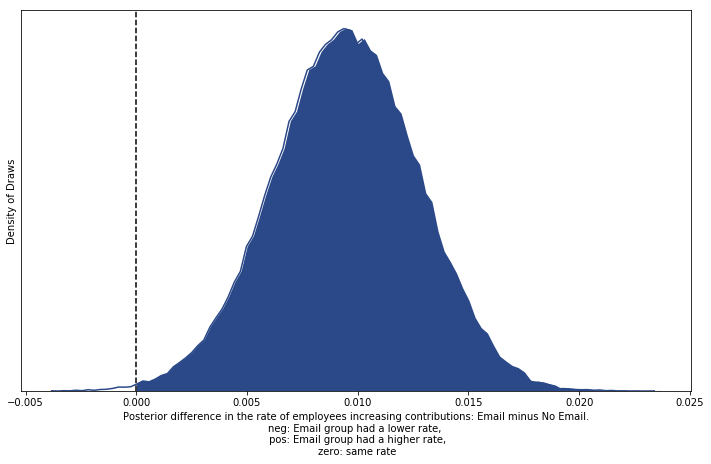

In [7]:
control, treatment = perform_ab.split_only2_groups(feb_enrolled_baseline)

print('A: No Email')
print('B: Either Email')
print()

posterior, successes_a = perform_ab.perform_ab_test(control_df = control,
                                                    treatment_df = treatment, 
                                                    column_of_interest = 'increased')

perform_ab.plot_abtest(posterior, 
                       successes_a, 
                       "increasing contributions", 
                       "No Email", 
                       "Email")

#### RQ4. Among employees with 457(b) accounts at baseline, how much more likely are employees to increase their contributions if they receive an email with a simplified choice rather than one without the simplification?

A: Simplified Choice Email
B: Basic Email

Number in control group: 4627
Number in treatment group: 4601

Total successes, control: 178
Total successes, treatment: 188

Conversion Rate:
Control Group Rate:3.8469999999999995%
Treatment Group Rate:4.086%
Percent change:6.215%

Degree of certainty: 0.722



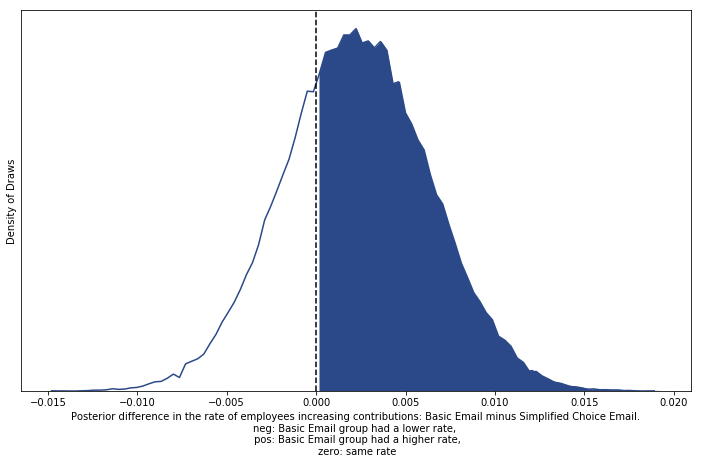

In [8]:
#Give our treatment assignments their own dataframes
control, basic_email, simplified_choice = perform_ab.split_groups(feb_enrolled_baseline)

print('A: Simplified Choice Email')
print('B: Basic Email')
print()

posterior, successes_a = perform_ab.perform_ab_test(control_df = simplified_choice,
                                                    treatment_df = basic_email, 
                                                    column_of_interest = 'increased')

perform_ab.plot_abtest(posterior, 
                       successes_a, 
                       "increasing contributions", 
                       "Simplified Choice Email", 
                       "Basic Email")

## Version 2: Dropping employees who contributed \$18,000+ or 100%

In [9]:
print('How many people contributed $18000+ or 100%?',
      len(feb_enrolled_baseline[(feb_enrolled_baseline.FLATAMOUNTBEFORETAX_0122>=18000)|\
                            (feb_enrolled_baseline.PERCENTAGEBEFORETAX_0122==100)]))

How many people contributed $18000+ or 100%? 5


In [10]:
#Create new df, removing folks who contribute either $18000, or 100%
v2_feb_enrolled_baseline = feb_enrolled_baseline[(feb_enrolled_baseline.FLATAMOUNTBEFORETAX_0122<18000) & \
                                                 (feb_enrolled_baseline.PERCENTAGEBEFORETAX_0122<100)].copy()

print()
print('Shape of original data:', feb_enrolled_baseline.shape)
print('Shape of new data:', v2_feb_enrolled_baseline.shape)


Shape of original data: (13855, 96)
Shape of new data: (13850, 96)


In [11]:
pd.crosstab(v2_feb_enrolled_baseline.treatment_real, v2_feb_enrolled_baseline.increased)


increased,False,True
treatment_real,,
0.0,4486,139
1.0,4412,188
2.0,4447,178


A: No Email
B: Either Email

Number in control group: 4625
Number in treatment group: 9225

Total successes, control: 139
Total successes, treatment: 366

Conversion Rate:
Control Group Rate:3.005%
Treatment Group Rate:3.9669999999999996%
Percent change:32.011%

Degree of certainty: 0.998



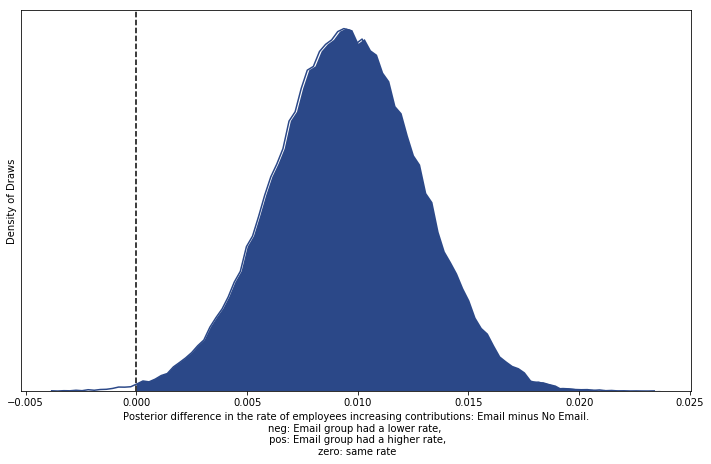

In [12]:
control, treatment = perform_ab.split_only2_groups(v2_feb_enrolled_baseline)

print('A: No Email')
print('B: Either Email')
print()

posterior, successes_a = perform_ab.perform_ab_test(control_df = control,
                                                    treatment_df = treatment, 
                                                    column_of_interest = 'increased')

perform_ab.plot_abtest(posterior, 
                       successes_a, 
                       'increasing contributions',
                       'No Email',
                       'Email')

# March Exploratory Outcomes

#### RQ1: How much more likely are employees to newly enroll in a 457(b) account if they receive a behaviorally-informed email rather than no email?

A/B Test, any email vs no email:

A: No Email
B: Either Email

Number in control group: 5876
Number in treatment group: 11678

Total successes, control: 0
Total successes, treatment: 0

Conversion Rate:
Control Group Rate:0.0%
Treatment Group Rate:0.0%
Percent change: 0.000%

Degree of certainty: 0.335



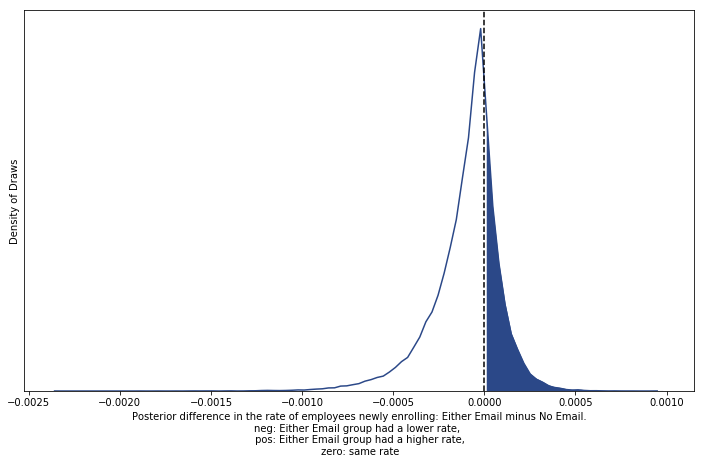

In [13]:
#Split groups into treatment and control
control, treatment = perform_ab.split_only2_groups(mar_not_enrolled_baseline)

print('A/B Test, any email vs no email:\n')

print('A: No Email')
print('B: Either Email')
print()

posterior, successes_a = perform_ab.perform_ab_test(control_df = control,
                                                    treatment_df = treatment, 
                                                    column_of_interest = 'newly_enrolled')

perform_ab.plot_abtest(posterior, successes_a, 'newly enrolling', 'No Email', 'Either Email')

#### RQ2. How much more likely are employees to newly enroll in a 457(b) account if they receive an email a with simplified choice rather than one without the simplification?

A/B Test, Simplified Choice Email vs Basic Email:

A: Simplified Choice Email
B: Basic Email

Number in control group: 5849
Number in treatment group: 5829

Total successes, control: 0
Total successes, treatment: 0

Conversion Rate:
Control Group Rate:0.0%
Treatment Group Rate:0.0%
Percent change: 0.000%

Degree of certainty: 0.501



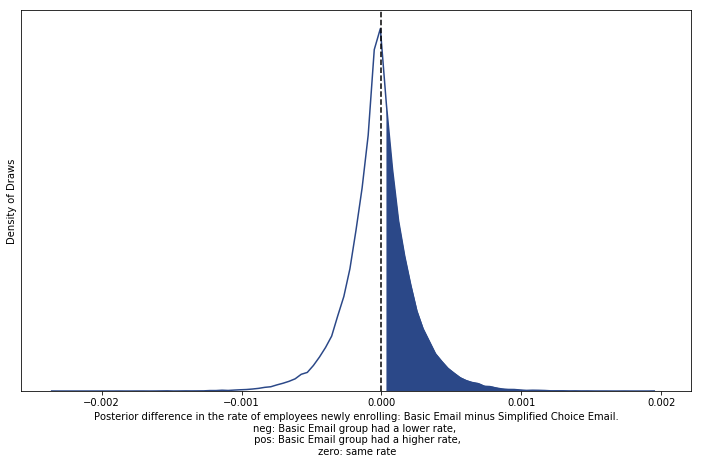

In [14]:
#Split into control and 2 treatment groups
control, basic_email, simplified_choice = perform_ab.split_groups(mar_not_enrolled_baseline)

print('A/B Test, Simplified Choice Email vs Basic Email:\n')
print('A: Simplified Choice Email')
print('B: Basic Email')
print()

posterior, successes_a = perform_ab.perform_ab_test(control_df=basic_email,
                                                    treatment_df=simplified_choice, 
                                                    column_of_interest = 'newly_enrolled')

perform_ab.plot_abtest(posterior, successes_a, 'newly enrolling', 'Simplified Choice Email', 'Basic Email')

#### RQ3. Among employees with 457(b) accounts at baseline, how much more likely are employees to increase their contributions if they receive a behaviorally-informed email rather than no email?

A: No Email
B: Either Email

Number in control group: 4610
Number in treatment group: 9196

Total successes, control: 185
Total successes, treatment: 470

Conversion Rate:
Control Group Rate:4.013%
Treatment Group Rate:5.111000000000001%
Percent change:27.359%

Degree of certainty: 0.998



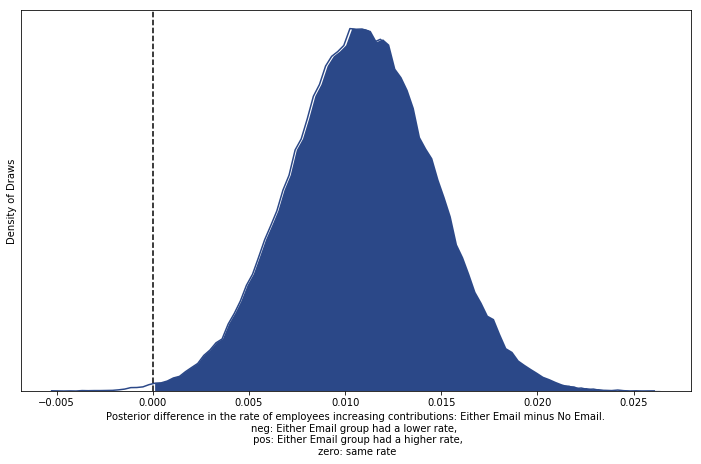

In [15]:
control, treatment = perform_ab.split_only2_groups(mar_enrolled_baseline)

print('A: No Email')
print('B: Either Email')
print()

posterior, successes_a = perform_ab.perform_ab_test(control_df = control,
                                                    treatment_df = treatment, 
                                                    column_of_interest = 'increased')

perform_ab.plot_abtest(posterior, successes_a, 'increasing contributions', 'No Email', 'Either Email')

#### RQ4. Among employees with 457(b) accounts at baseline, how much more likely are employees to increase their contributions if they receive an email with a simplified choice rather than one without the simplification?

A: Simplified Choice Email
B: Basic Email

Number in control group: 4611
Number in treatment group: 4585

Total successes, control: 234
Total successes, treatment: 236

Conversion Rate:
Control Group Rate:5.075%
Treatment Group Rate:5.147%
Percent change:1.427%

Degree of certainty: 0.563



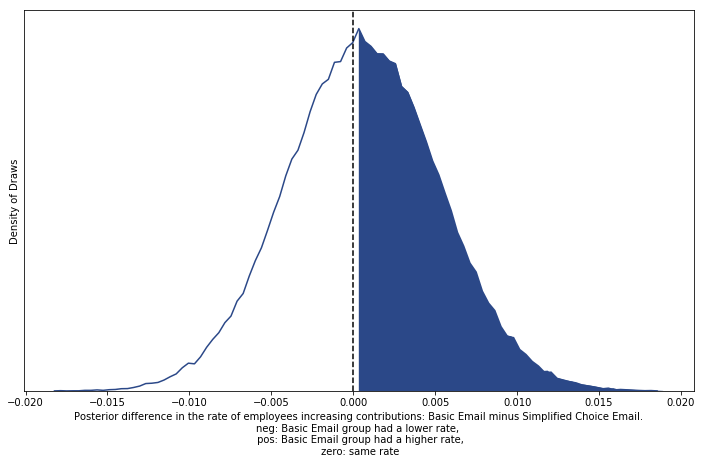

In [16]:
#Give our treatment assignments their own dataframes
control, basic_email, simplified_choice = perform_ab.split_groups(mar_enrolled_baseline)

print('A: Simplified Choice Email')
print('B: Basic Email')
print()

posterior, successes_a = perform_ab.perform_ab_test(control_df = simplified_choice,
                                                    treatment_df = basic_email, 
                                                    column_of_interest = 'increased')

perform_ab.plot_abtest(posterior, successes_a, 'increasing contributions', 'Simplified Choice Email', 'Basic Email')